In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Study\Bicycle Traffic\Data Excel\samplebicycledata.csv")
df.head()

,ID,interval,timestamp,latitude,longitude,distance,heartrate,cadence,speed,power,...,fitness,height,weight,altitude,latitude_rad,longitude_rad,heartrate_delayed,grade_percentage,grade_category,grade_percentage_rounded
0,RW_0264,56,2023-07-13T13:37:37.000Z,51.241379,7.152575,245.059998,118.0,85.0,6.615,153.0,...,Good,175,74.0,246.14999,0.894331,0.124836,138,1.664145,6 Slight uphill [1% to 3%],2
1,RW_0264,57,2023-07-13T13:37:38.000Z,51.241319,7.152594,251.619995,118.0,83.0,6.559,228.0,...,Good,175,74.0,246.25999,0.894330,0.124836,139,1.676830,6 Slight uphill [1% to 3%],2
2,RW_0264,58,2023-07-13T13:37:39.000Z,51.241269,7.152622,257.929993,118.0,83.0,6.308,308.0,...,Good,175,74.0,246.67999,0.894329,0.124837,140,6.656104,8 Steep uphill [5% to 10%],7
3,RW_0264,59,2023-07-13T13:37:40.000Z,51.241221,7.152653,263.980011,119.0,80.0,6.056,308.0,...,Good,175,74.0,246.99001,0.894328,0.124837,140,5.124282,8 Steep uphill [5% to 10%],5
4,RW_0264,60,2023-07-13T13:37:41.000Z,51.241173,7.152683,269.619995,119.0,85.0,5.636,203.0,...,Good,175,74.0,247.27000,0.894327,0.124838,141,4.964376,7 Moderate uphill [3% to 5%],5


# Interpolating cadence data

### Loading data for rider RW_2015, RW_1111. RW_7125, RW_8403 

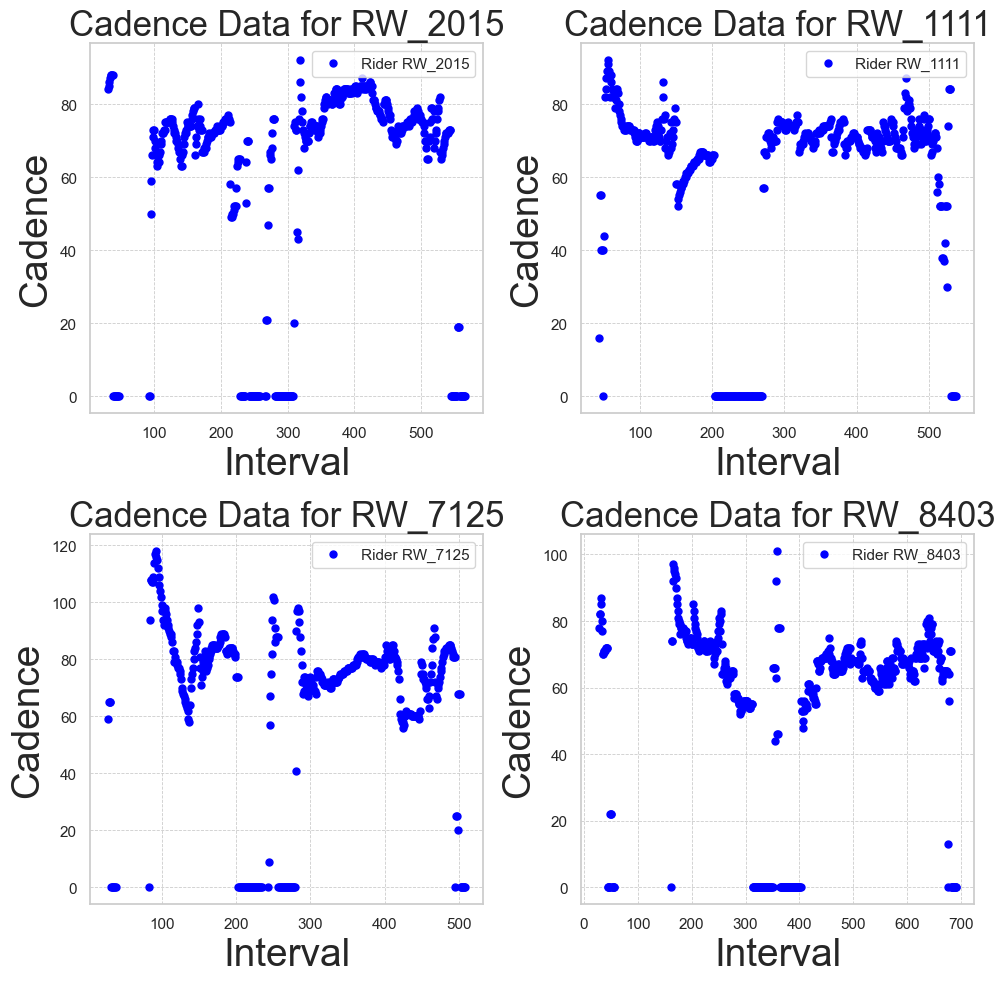

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def interpolate_heart_rate(interval, cadence, method, x_new):
    f = interp1d(interval, cadence, kind=method, fill_value="extrapolate")
    return f(x_new)

rider_ids = ['RW_2015', 'RW_1111', 'RW_7125', 'RW_8403']
interpolation_methods = ['nearest', 'linear', 'quadratic', 'cubic']

x_new = np.linspace(df['interval'].min(), min(500, df['interval'].max()), 100)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, rider_id in enumerate(rider_ids):
    ax = axs[i // 2, i % 2]  
    rider_data = df[df['ID'] == rider_id].dropna(subset=['cadence', 'interval'])
    interval = rider_data['interval'].values
    cadence = rider_data['cadence'].values
    
    ax.plot(interval, cadence, '.', markersize=10, label=f'Rider {rider_id}', color='blue')
    ax.set_title(f'Cadence Data for {rider_id}', fontsize=25)
    ax.set_xlabel('Interval', fontsize=28)
    ax.set_ylabel('Cadence', fontsize=28)
    ax.grid(True, which='both', linestyle='--', linewidth=0.6)
    ax.legend()
    
plt.tight_layout()
plt.savefig('C:\Study\Bicycle Traffic\Final Writing\cadence.png', format='png')
plt.show()

### Nearest, Linear, Quadratic, Cubic Interpolation

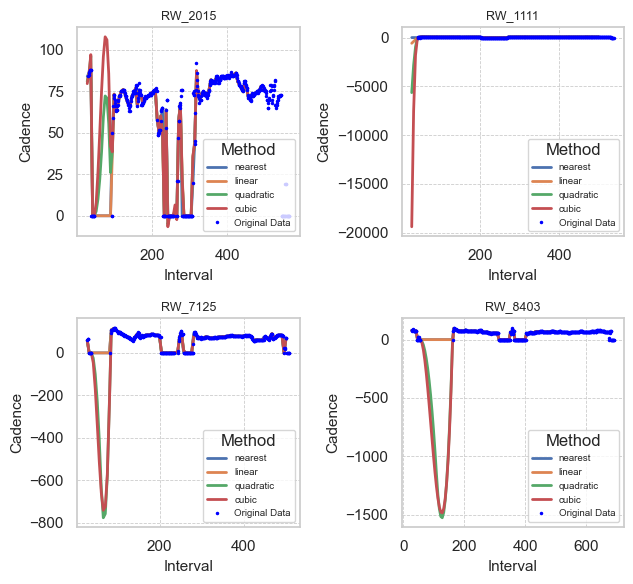

In [33]:

def interpolate_heart_rate(interval, cadence, method, x_new):
    f = interp1d(interval, cadence, kind=method, fill_value="extrapolate")
    return f(x_new)

rider_ids = ['RW_2015', 'RW_1111', 'RW_7125', 'RW_8403']
interpolation_methods = ['nearest', 'linear', 'quadratic', 'cubic']

x_new = np.linspace(df['interval'].min(), min(500, df['interval'].max()), 100)
fig, axs2 = plt.subplots(2, 2, figsize=(6.5, 6))

for i, rider_id in enumerate(rider_ids):
    ax2 = axs2[i // 2, i % 2]
    rider_data = df[df['ID'] == rider_id].dropna(subset=['cadence', 'interval'])
    interval = rider_data['interval'].values
    cadence = rider_data['cadence'].values
    
    for method in interpolation_methods:
        y_new = interpolate_heart_rate(interval, cadence, method, x_new)
        ax2.plot(x_new, y_new, label=method, linewidth=2)

    ax2.plot(interval, cadence, '.', markersize=3, label='Original Data', color='blue')
    ax2.set_title(f'{rider_id}', fontsize=9)
    ax2.set_xlabel('Interval', fontsize=11)
    ax2.set_ylabel('Cadence', fontsize=11)
    ax2.grid(True, which='both', linestyle='--', linewidth=0.6)
    ax2.legend(title='Method', fontsize=7)

# Adjust spacing between subplots
plt.tight_layout()

# Save both figures as high-resolution images
fig.savefig('riders_heart_rate_comparison.png', dpi=300, bbox_inches='tight')
fig.savefig('riders_interpolation_methods.png', dpi=300, bbox_inches='tight')

# Show the plots
plt.show()

### PCHIP

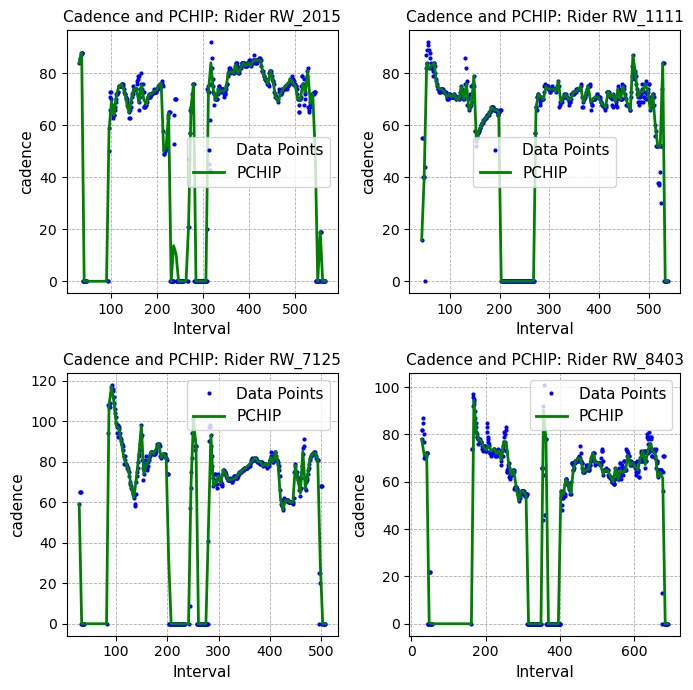

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator

rider_ids = ['RW_2015', 'RW_1111', 'RW_7125', 'RW_8403']

fig, axes = plt.subplots(2, 2, figsize=(7, 7))
axes = axes.ravel()

for i, rider_id in enumerate(rider_ids):
    
    rider_data = df[df['ID'] == rider_id].copy()
    
    rider_data = rider_data.dropna(subset=['heartrate', 'interval'])
    
    interval = rider_data['interval'].values
    cadence = rider_data['cadence'].values
    
    pchip_interpolator = PchipInterpolator(interval, cadence)
    
    x_new = np.linspace(min(interval), min(max(interval), 700), 100)
    
    y_pchip = pchip_interpolator(x_new)
    
    axes[i].plot(interval, cadence, '.', label='Data Points', markersize=4, color='blue')
    axes[i].plot(x_new, y_pchip, label='PCHIP', linestyle='-', color='green', linewidth=2)
    
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.6)
    axes[i].set_xlabel('Interval', fontsize=11)
    axes[i].set_ylabel('cadence', fontsize=11)
    axes[i].set_title(f'Cadence and PCHIP: Rider {rider_id}', fontsize=11)
    
    axes[i].tick_params(axis='both', which='major', labelsize=10)
    
    axes[i].legend(fontsize=11)
    
plt.tight_layout()

# Save the figure as a high-resolution image for thesis
plt.savefig('cadence_pchip_comparison.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### B-Spline

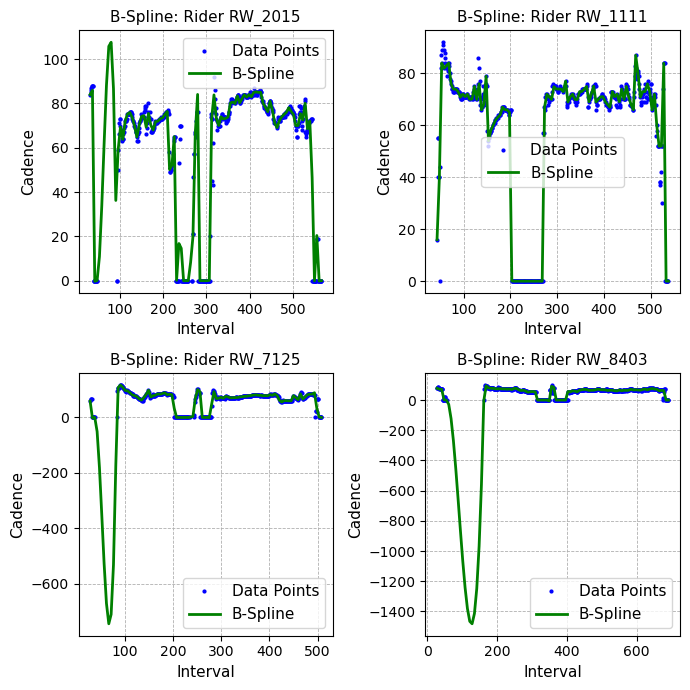

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev

rider_ids = ['RW_2015', 'RW_1111', 'RW_7125', 'RW_8403']

fig, axes = plt.subplots(2, 2, figsize=(7, 7))
axes = axes.ravel()

# Iterate through each rider and plot their data
for i, rider_id in enumerate(rider_ids):
    
    rider_data = df[df['ID'] == rider_id].copy()
    
    rider_data = rider_data.dropna(subset=['heartrate', 'interval'])
    
    interval = rider_data['interval'].values
    cadence = rider_data['cadence'].values
    
    
    tck = splrep(interval, cadence, s=1)
   
    x_new = np.linspace(min(interval), min(max(interval), 700), 100)
   
    y_spline = splev(x_new, tck)
    
    axes[i].plot(interval, cadence, '.', label='Data Points', markersize=4, color='blue')
    axes[i].plot(x_new, y_spline, label='B-Spline', linestyle='-', color='green', linewidth=2)
    
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.6)
    axes[i].set_xlabel('Interval', fontsize=11)
    axes[i].set_ylabel('Cadence', fontsize=11)
    axes[i].set_title(f'B-Spline: Rider {rider_id}', fontsize=11)
    
    axes[i].tick_params(axis='both', which='major', labelsize=10)
    
    axes[i].legend(fontsize=11)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a high-resolution image for thesis
plt.savefig('cadence_b_spline_comparison.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### LOWESS

C:\Users\ahmad\anaconda\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


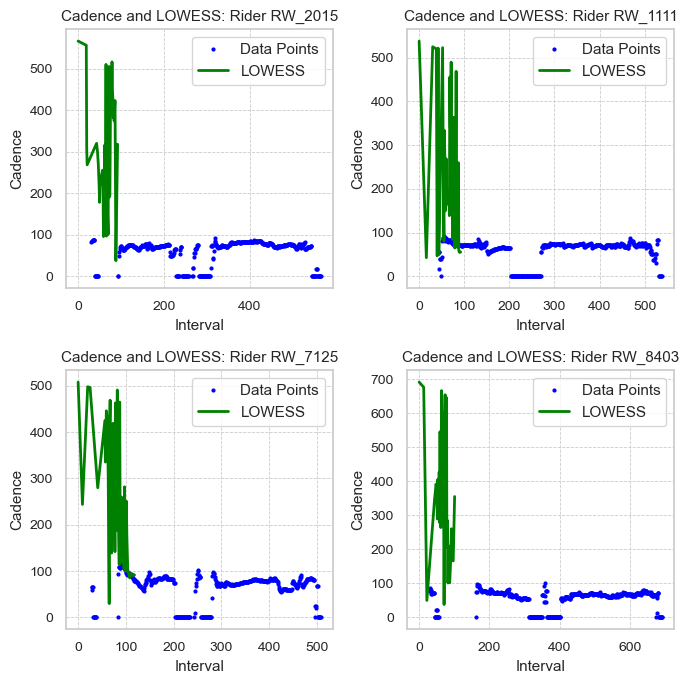

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

rider_ids = ['RW_2015', 'RW_1111', 'RW_7125', 'RW_8403']

fig, axes = plt.subplots(2, 2, figsize=(7, 7))
axes = axes.ravel()

for i, rider_id in enumerate(rider_ids):
    
    rider_data = df[df['ID'] == rider_id].copy()
    
    rider_data = rider_data.dropna(subset=['cadence', 'interval'])
    
    interval = rider_data['interval'].values
    cadence = rider_data['cadence'].values
    
    lowess_smooth = lowess(interval, cadence, frac=0.01)  
    x_smooth = lowess_smooth[:, 0]
    y_smooth = lowess_smooth[:, 1]
    
    axes[i].plot(interval, cadence, '.', label='Data Points', markersize=4, color='blue')
    axes[i].plot(x_smooth, y_smooth, label='LOWESS', linestyle='-', color='green', linewidth=2)
    
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.6)
    axes[i].set_xlabel('Interval', fontsize=11)
    axes[i].set_ylabel('Cadence', fontsize=11)
    axes[i].set_title(f'Cadence and LOWESS: Rider {rider_id}', fontsize=11)
    
    axes[i].tick_params(axis='both', which='major', labelsize=10)
    
    axes[i].legend(fontsize=11)

plt.tight_layout()

plt.savefig('cadence_lowess_comparison.png', dpi=300, bbox_inches='tight')

plt.show()

# PCHIP and Smoothing Algorithms

### Gaussian and PCHIP

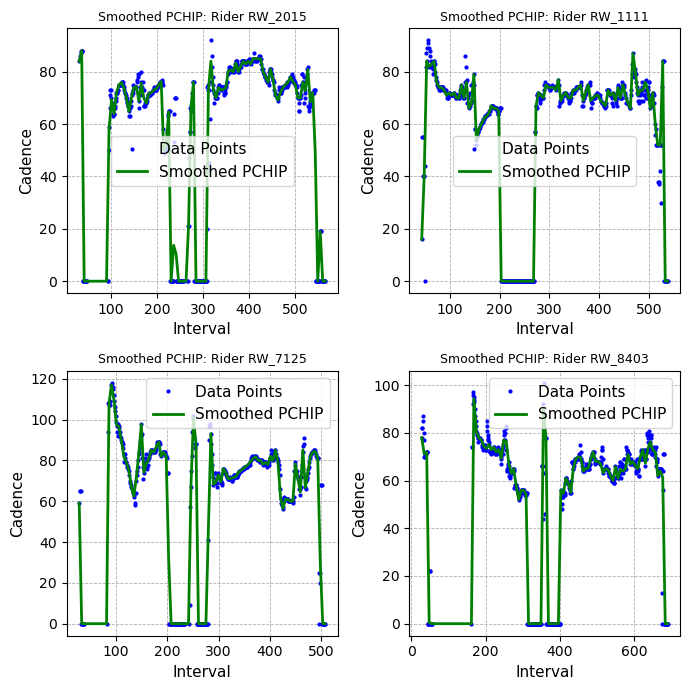

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator
from scipy.ndimage import gaussian_filter1d

rider_ids = ['RW_2015', 'RW_1111', 'RW_7125', 'RW_8403']

fig, axes = plt.subplots(2, 2, figsize=(7, 7))
axes = axes.ravel()

for i, rider_id in enumerate(rider_ids):
    
    rider_data = df[df['ID'] == rider_id].copy()
    
    rider_data = rider_data.dropna(subset=['cadence', 'interval'])
    
    interval = rider_data['interval'].values
    cadence = rider_data['cadence'].values
    
    # PCHIP interpolation
    pchip_interpolator = PchipInterpolator(interval, cadence)
    
    # Generate new interpolated interval values for plotting
    x_new = np.linspace(min(interval), min(max(interval), 700), 100)
    
    # Perform interpolation using PCHIP
    y_pchip = pchip_interpolator(x_new)
    
    # Apply Gaussian smoothing
    y_smoothed = gaussian_filter1d(y_pchip, sigma=.1)  # sigma defines the smoothing strength
    
   
    axes[i].plot(interval, cadence, '.', label='Data Points', markersize=4, color='blue')
    axes[i].plot(x_new, y_smoothed, label='Smoothed PCHIP', linestyle='-', color='green', linewidth=2)
    
   
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.6)
    axes[i].set_xlabel('Interval', fontsize=11)
    axes[i].set_ylabel('Cadence', fontsize=11)
    axes[i].set_title(f'Smoothed PCHIP: Rider {rider_id}', fontsize=9)
    
    axes[i].tick_params(axis='both', which='major', labelsize=10)
    
    axes[i].legend(fontsize=11)

plt.tight_layout()

plt.savefig('cadence_smoothed_pchip_comparison.png', dpi=300, bbox_inches='tight')

plt.show()

### Moving Average

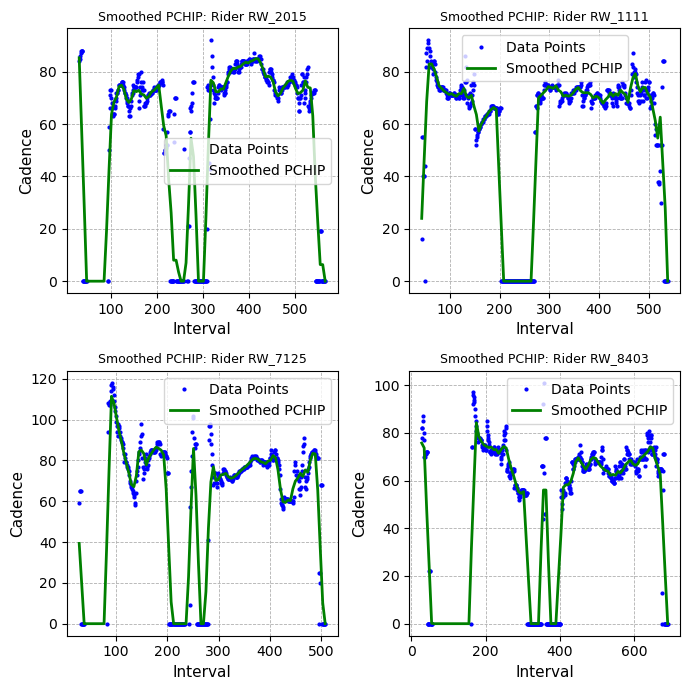

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator
from scipy.ndimage import uniform_filter1d

rider_ids = ['RW_2015', 'RW_1111', 'RW_7125', 'RW_8403']


fig, axes = plt.subplots(2, 2, figsize=(7, 7))
axes = axes.ravel()


window_size = 5
for i, rider_id in enumerate(rider_ids):
   
    rider_data = df[df['ID'] == rider_id].copy()
    rider_data = rider_data.dropna(subset=['cadence', 'interval'])
    
    interval = rider_data['interval'].values
    cadence = rider_data['cadence'].values
    
    pchip_interpolator = PchipInterpolator(interval, cadence)
    
    x_new = np.linspace(min(interval), min(max(interval), 700), 100)
    
    y_pchip = pchip_interpolator(x_new)
    
    y_smoothed = uniform_filter1d(y_pchip, size=3)  

    
    axes[i].plot(interval, cadence, '.', label='Data Points', markersize=4, color='blue')
    axes[i].plot(x_new, y_smoothed, label='Smoothed PCHIP', linestyle='-', color='green', linewidth=2)
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.6)
    axes[i].set_xlabel('Interval', fontsize=11)
    axes[i].set_ylabel('Cadence', fontsize=11)
    axes[i].set_title(f'Smoothed PCHIP: Rider {rider_id}', fontsize=9)
    
    axes[i].tick_params(axis='both', which='major', labelsize=10)
    
    # Add legend
    axes[i].legend(fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a high-resolution image for thesis
plt.savefig('cadence_smoothed_pchip_moving_average_comparison.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Spline

C:\Users\ahmad\anaconda\Lib\site-packages\scipy\interpolate\_fitpack2.py:313: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


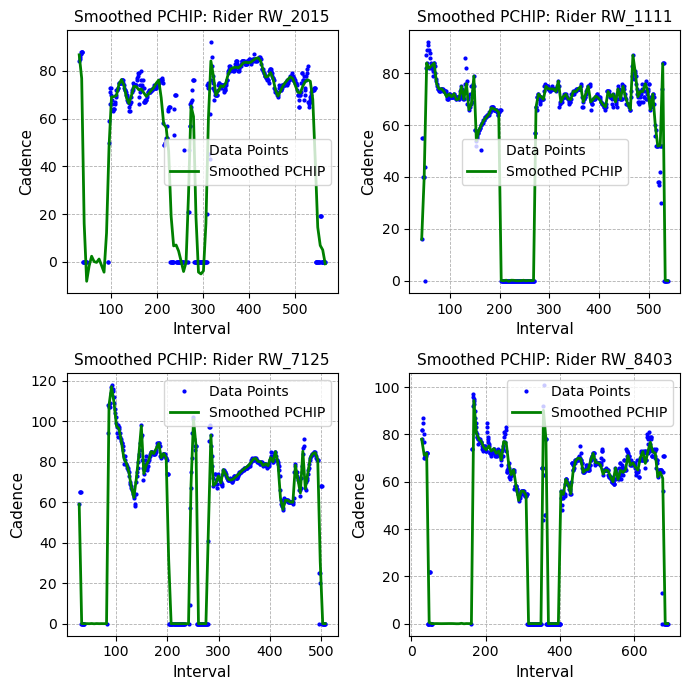

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator, UnivariateSpline

rider_ids = ['RW_2015', 'RW_1111', 'RW_7125', 'RW_8403']

fig, axes = plt.subplots(2, 2, figsize=(7, 7))
axes = axes.ravel()

for i, rider_id in enumerate(rider_ids):
    
    rider_data = df[df['ID'] == rider_id].copy()
    
    rider_data = rider_data.dropna(subset=['heartrate', 'interval'])
    
    interval = rider_data['interval'].values
    cadence = rider_data['cadence'].values
    
    pchip_interpolator = PchipInterpolator(interval, cadence)
    
    x_new = np.linspace(min(interval), min(max(interval), 700), 100)
    
    y_pchip = pchip_interpolator(x_new)
    
    # Apply Spline smoothing
    spline_smooth = UnivariateSpline(x_new, y_pchip, s=1)  # s-smoothing factor
    
    y_smooth = spline_smooth(x_new)
    
    # Plot the data points and the smoothed spline interpolation
    axes[i].plot(interval, cadence, '.', label='Data Points', markersize=4, color='blue')
    axes[i].plot(x_new, y_smooth, label='Smoothed PCHIP', linestyle='-', color='green', linewidth=2)
    
    # Add grid, labels, and title
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.6)
    axes[i].set_xlabel('Interval', fontsize=11)
    axes[i].set_ylabel('Cadence', fontsize=11)
    axes[i].set_title(f'Smoothed PCHIP: Rider {rider_id}', fontsize=11)
    
    # Adjust ticks for readability
    axes[i].tick_params(axis='both', which='major', labelsize=10)
    
    # Add legend
    axes[i].legend(fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a high-resolution image for thesis
plt.savefig('cadence_smoothed_pchip_spline_comparison.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Applying PCHIP and Gaussian Smoothing to All Cadence Data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

grouped = df.groupby('ID')['cadence']

cadence_df = pd.concat([group.reset_index(drop=True) for _, group in grouped], axis=1)

cadence_df.columns = [rider_id for rider_id, _ in grouped]


In [11]:
from scipy.interpolate import PchipInterpolator
from scipy.ndimage import gaussian_filter1d

def apply_pchip_and_gaussian(series, sigma=2):
    
    series = series.iloc[:1000]
    
    series = series[:series.last_valid_index() + 1]
    
    not_nan = ~series.isna()
    if not np.any(not_nan):
        return series 
    
    x = np.arange(len(series))
    y = series[not_nan]

    # PCHIP interpolation
    pchip_interpolator = PchipInterpolator(x[not_nan], y)
    y_interp = pchip_interpolator(x)
    
    # Apply Gaussian smoothing
    y_smoothed = gaussian_filter1d(y_interp, sigma=sigma)
    
    # Reinsert the trailing NaNs
    y_smoothed = np.concatenate([y_smoothed, np.full(len(series.index) - len(y_smoothed), np.nan)])
    
    return pd.Series(y_smoothed, index=series.index)

# Apply the function to each column in the DataFrame for the first 600 intervals
smoothed_cadence_df = cadence_df.apply(lambda col: apply_pchip_and_gaussian(col, sigma=.1))

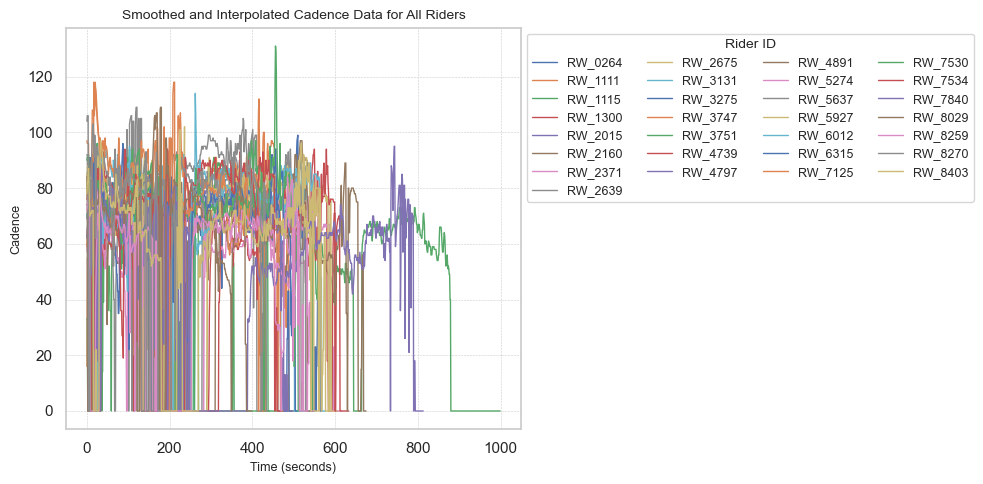

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn for enhanced visual style
sns.set(style="whitegrid")

# Define the figure size
plt.figure(figsize=(10, 5))

# Plot each rider's smoothed heart rate data with distinct colors
for rider_id in smoothed_cadence_df.columns:
    plt.plot(smoothed_cadence_df.index, smoothed_cadence_df[rider_id], label=rider_id, linewidth=1)

# Add labels and title with professional formatting
plt.xlabel('Time (seconds)', fontsize=9)
plt.ylabel('Cadence', fontsize=9)
plt.title('Smoothed and Interpolated Cadence Data for All Riders', fontsize=10)

# Add a legend outside the plot for better readability
plt.legend(title='Rider ID', title_fontsize=10, fontsize=9, bbox_to_anchor=(1, 1), loc='upper left', ncol=4)


# Adjust the ticks for better readability
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add gridlines with professional styling
plt.grid(True, which='both', linestyle='--', linewidth=0.4)

# Ensure the layout is tight and the plot doesn't overlap
plt.tight_layout()

# Save the figure as a high-resolution image suitable for a thesis
plt.savefig('smoothed_heart_rate_thesis.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

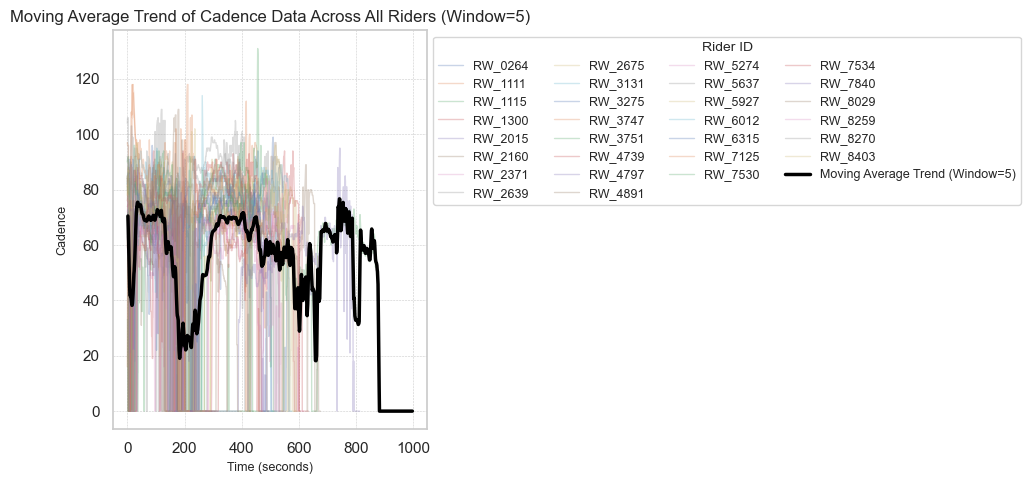

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set up Seaborn for enhanced visual style
sns.set(style="whitegrid")

# Step 1: Calculate the mean cadence across all riders at each time point
mean_cadence = smoothed_cadence_df.mean(axis=1)

# Step 2: Apply a moving average to the mean cadence
window_size = 5  # Adjust the window size as needed for smoothing
moving_average_cadence = mean_cadence.rolling(window=window_size, center=True).mean()

# Step 3: Plot each rider's cadence data with transparency and the moving average trend line
plt.figure(figsize=(10, 5))

# Plot all riders' cadence data with transparency
for rider_id in smoothed_cadence_df.columns:
    plt.plot(smoothed_cadence_df.index, smoothed_cadence_df[rider_id], label=rider_id, linewidth=1, alpha=0.3)

# Plot the moving average trend line
plt.plot(smoothed_cadence_df.index, moving_average_cadence, color='black', linewidth=2.5, label=f'Moving Average Trend (Window={window_size})', linestyle='-')

# Add labels and title with professional formatting
plt.xlabel('Time (seconds)', fontsize=9)
plt.ylabel('Cadence', fontsize=9)
plt.title(f'Moving Average Trend of Cadence Data Across All Riders (Window={window_size})', fontsize=12)

# Add a legend outside the plot for better readability
plt.legend(title='Rider ID', title_fontsize=10, fontsize=9, bbox_to_anchor=(1, 1), loc='upper left', ncol=4)

# Adjust the ticks for better readability
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add gridlines with professional styling
plt.grid(True, which='both', linestyle='--', linewidth=0.4)

# Ensure the layout is tight and the plot doesn't overlap
plt.tight_layout()

# Save the figure as a high-resolution image
plt.savefig('cadence_trend_moving_average.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


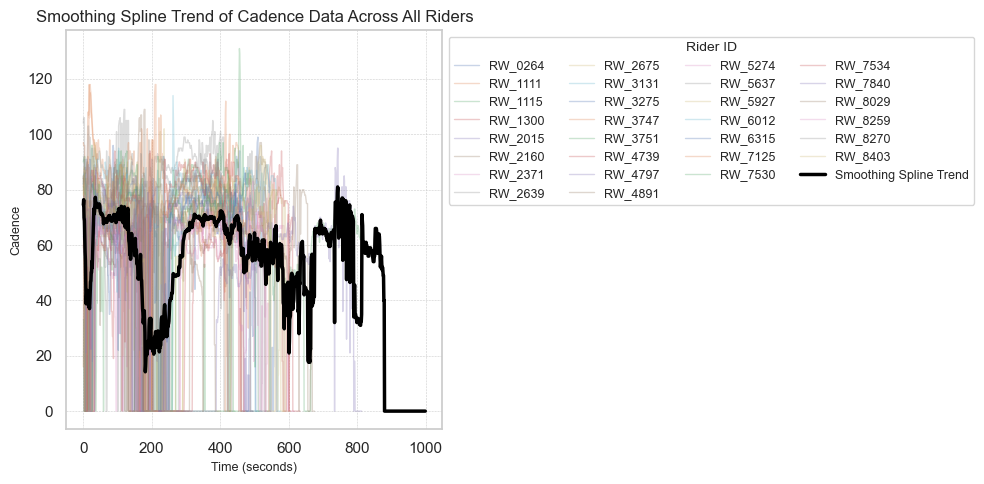

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import seaborn as sns

# Set up Seaborn for enhanced visual style
sns.set(style="whitegrid")

# Step 1: Calculate the mean cadence across all riders at each time point
mean_cadence = smoothed_cadence_df.mean(axis=1)

# Step 2: Prepare the data for smoothing spline
x = np.arange(len(mean_cadence))  # Time index as the independent variable
y = mean_cadence.values  # Mean cadence as the dependent variable

# Step 3: Apply a smoothing spline
smoothing_factor = 0.00001  # Adjust the smoothing factor to control smoothness
spline = UnivariateSpline(x, y, s=smoothing_factor)
spline_smoothed_cadence = spline(x)

# Step 4: Plot each rider's cadence data with transparency and the smoothing spline trend line
plt.figure(figsize=(10, 5))

# Plot all riders' cadence data with transparency
for rider_id in smoothed_cadence_df.columns:
    plt.plot(smoothed_cadence_df.index, smoothed_cadence_df[rider_id], label=rider_id, linewidth=1, alpha=0.3)

# Plot the smoothing spline trend line
plt.plot(smoothed_cadence_df.index, spline_smoothed_cadence, color='black', linewidth=2.5, label='Smoothing Spline Trend', linestyle='-')

# Add labels and title with professional formatting
plt.xlabel('Time (seconds)', fontsize=9)
plt.ylabel('Cadence', fontsize=9)
plt.title('Smoothing Spline Trend of Cadence Data Across All Riders', fontsize=12)

# Add a legend outside the plot for better readability
plt.legend(title='Rider ID', title_fontsize=10, fontsize=9, bbox_to_anchor=(1, 1), loc='upper left', ncol=4)

# Adjust the ticks for better readability
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add gridlines with professional styling
plt.grid(True, which='both', linestyle='--', linewidth=0.4)

# Ensure the layout is tight and the plot doesn't overlap
plt.tight_layout()

# Save the figure as a high-resolution image
plt.savefig('cadence_trend_smoothing_spline.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


Error Metrics for Different Moving Average Window Sizes:
   Window Size       MAE        MSE      RMSE        R²
0            5  1.420305   7.999515  2.828341  0.984603
1           10  2.219377  15.353059  3.918298  0.970259
2           15  2.753804  21.067598  4.589945  0.958786
3           25  3.330096  28.655008  5.353037  0.943052


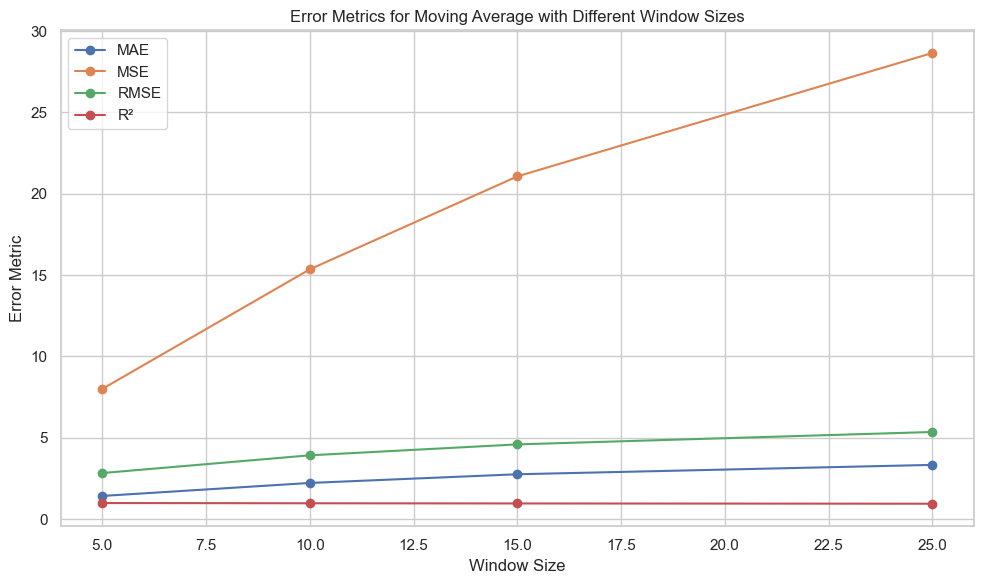

In [27]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Calculate the mean cadence across all riders at each time point
mean_cadence = smoothed_cadence_df.mean(axis=1)

# Define the different window sizes to test
window_sizes = [5, 10, 15, 25]

# Initialize a dictionary to store error metrics for each window size
error_metrics = []

# Loop over each window size to apply the moving average and calculate error metrics
for window_size in window_sizes:
    # Apply moving average with the current window size
    smoothed_cadence = mean_cadence.rolling(window=window_size, center=True).mean()
    
    # Drop NaN values created by the moving average at the edges
    valid_indices = smoothed_cadence.dropna().index
    y_true = mean_cadence[valid_indices]
    y_pred = smoothed_cadence[valid_indices]
    
    # Calculate error metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    
    # Store the results
    error_metrics.append({
        "Window Size": window_size,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    })

# Convert error metrics to a DataFrame for easy viewing
error_metrics_df = pd.DataFrame(error_metrics)

# Display the error metrics for each window size
print("Error Metrics for Different Moving Average Window Sizes:")
print(error_metrics_df)

# Plot the error metrics (optional)
plt.figure(figsize=(10, 6))
plt.plot(error_metrics_df["Window Size"], error_metrics_df["MAE"], label="MAE", marker='o')
plt.plot(error_metrics_df["Window Size"], error_metrics_df["MSE"], label="MSE", marker='o')
plt.plot(error_metrics_df["Window Size"], error_metrics_df["RMSE"], label="RMSE", marker='o')
plt.plot(error_metrics_df["Window Size"], error_metrics_df["R²"], label="R²", marker='o')

# Customize plot
plt.xlabel("Window Size")
plt.ylabel("Error Metric")
plt.title("Error Metrics for Moving Average with Different Window Sizes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Error Metrics for Different Smoothing Factors:
   Smoothing Factor       MAE           MSE      RMSE   R²
0      1.000000e-01  0.005011  1.000264e-04  0.010001  1.0
1      1.000000e-03  0.000423  9.997015e-07  0.001000  1.0
2      1.000000e-05  0.000046  1.000659e-08  0.000100  1.0
3      1.000000e-07  0.000005  1.000887e-10  0.000010  1.0


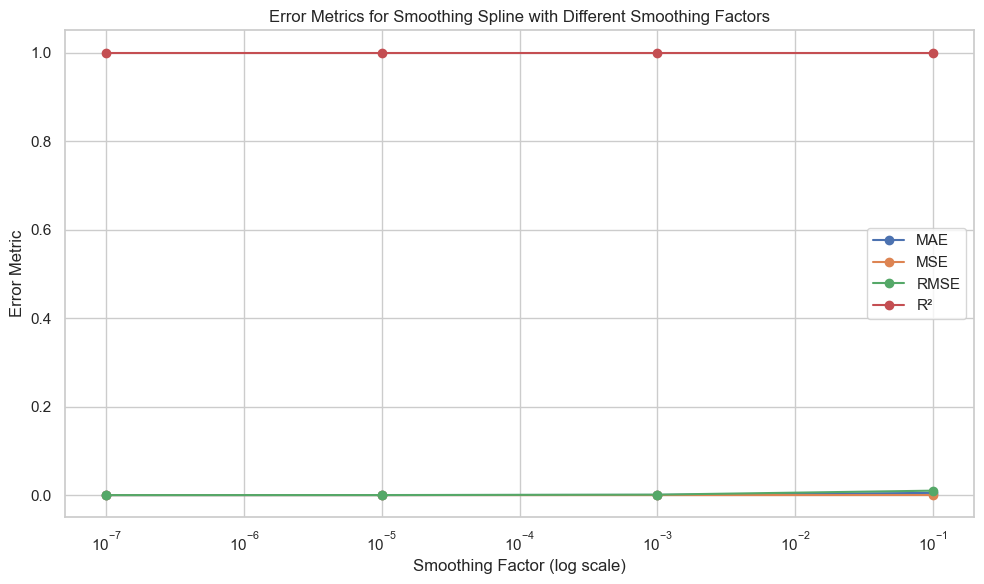

In [28]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

# Step 1: Calculate the mean cadence across all riders at each time point
mean_cadence = smoothed_cadence_df.mean(axis=1)

# Define the different smoothing factors to test
smoothing_factors = [0.1, 0.001, 0.00001, 0.0000001]

# Initialize a list to store error metrics for each smoothing factor
error_metrics = []

# Prepare the data for the spline (time index as X, mean cadence as y)
x = np.arange(len(mean_cadence))
y = mean_cadence.values

# Loop over each smoothing factor to apply the smoothing spline and calculate error metrics
for s in smoothing_factors:
    # Apply smoothing spline with the current smoothing factor
    spline = UnivariateSpline(x, y, s=s)
    smoothed_cadence = spline(x)
    
    # Calculate error metrics
    mae = mean_absolute_error(y, smoothed_cadence)
    mse = mean_squared_error(y, smoothed_cadence)
    rmse = np.sqrt(mse)
    r2 = 1 - (np.sum((y - smoothed_cadence) ** 2) / np.sum((y - np.mean(y)) ** 2))
    
    # Store the results
    error_metrics.append({
        "Smoothing Factor": s,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    })

# Convert error metrics to a DataFrame for easy viewing
error_metrics_df = pd.DataFrame(error_metrics)

# Display the error metrics for each smoothing factor
print("Error Metrics for Different Smoothing Factors:")
print(error_metrics_df)

# Plot the error metrics (optional)
plt.figure(figsize=(10, 6))
plt.plot(error_metrics_df["Smoothing Factor"], error_metrics_df["MAE"], label="MAE", marker='o')
plt.plot(error_metrics_df["Smoothing Factor"], error_metrics_df["MSE"], label="MSE", marker='o')
plt.plot(error_metrics_df["Smoothing Factor"], error_metrics_df["RMSE"], label="RMSE", marker='o')
plt.plot(error_metrics_df["Smoothing Factor"], error_metrics_df["R²"], label="R²", marker='o')

# Customize plot
plt.xlabel("Smoothing Factor (log scale)")
plt.xscale('log')  # Use a log scale for smoothing factor for better visibility
plt.ylabel("Error Metric")
plt.title("Error Metrics for Smoothing Spline with Different Smoothing Factors")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
